In [70]:
from IPython.display import Image

Image(filename='LT5-ACS-header.png')

In [3]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t, norm, mannwhitneyu, wilcoxon
import math
import itertools

# 1. Executive Summary

Bitcoin (BTC) trading has seen a meteoric rise since it was launched in 2009.[1] In 2019, it was even named the best asset of the decade by the Bank of America Merrill Lynch.[2] This underscores Bitcoin’s incredible growth and the increasing acceptance of financial institutions worldwide. As Bitcoin continues to evolve, traders have also adapted to the changing landscape by developing sophisticated strategies. 

One distinctive feature of Bitcoin is its halving process, which occurs roughly every four years and reduces the rate of new bitcoin creation by half. This mechanism is built into Bitcoin's protocol to manage inflation, making Bitcoin a deflationary asset over time. 

This project analyzes the historical prices of Bitcoin and assesses the impact of halving on the Bitcoin prices over the years. The dataset was divided into two main periods, namely Halving (180 days before and after each Halving date) and Non-Halving. 

This project involves statistical testing and comparison of price volatility metrics derived from historical data surrounding Bitcoin’s Halving events.

## 1.1 Key Findings

* Bitcoin prices show a statistically significant difference between Halving and Non-Halving periods. 

* In 2016, the volatility of Bitcoin prices during Halving period was significantly higher than during the Non-Halving period. 

* Bitcoin price volatility does not follow a normal distribution. 

* There are also volatility differences within Non-Halving regions, but it’s not as consistent as compared to the volatility differences between Halving and Non-Halving periods. 

This project aims to provide insights for investors, traders, and financial institutions in adjusting their investment strategies accordingly. 

# 2. Introduction

## 2.1 Overview

Bitcoin is a cryptocurrency (a digital currency) intended to function as money and a means of payment, independent of any individual, group, or organization. Meanwhile, mining is the process through which new Bitcoins are created, involving a network-wide competition where miners compete to find a cryptographic solution that meets specific criteria.[3] When a miner successfully discovers this solution, they are rewarded with Bitcoins as well as transaction fees for their efforts. 

There have been four Bitcoin halving activities since 2012, and halving is done every four years. The last halving was done on April 19, 2024, and the next one is expected to happen in 2028.[4] 

## 2.2 Research Questions

1. Is there a statistically significant difference in Bitcoin price volatility near halving events versus the periods in between them? 

2. What is the historical relationship between Bitcoin halving events and changes in its price? 

3. Are there any discernible patterns in the price movement leading up to and following a Bitcoin halving?

## 2.3 Scope and Limitations

Bitcoin was launched in January 2009, but data for its prices during that year is not available because it wasn’t being traded then the same way it is being traded today. The earliest data for the prices of Bitcoin became available in July 2010.[5]

This project only covers data on Bitcoin prices from July 27, 2010, to May 22, 2024.[6] It includes all the halving events that ever took place, which occurred on the following dates:

1. November 28, 2012; 

2. July 9, 2016; 

3. May 11, 2020; and 

4. April 19, 2024 

# 3. Methodology

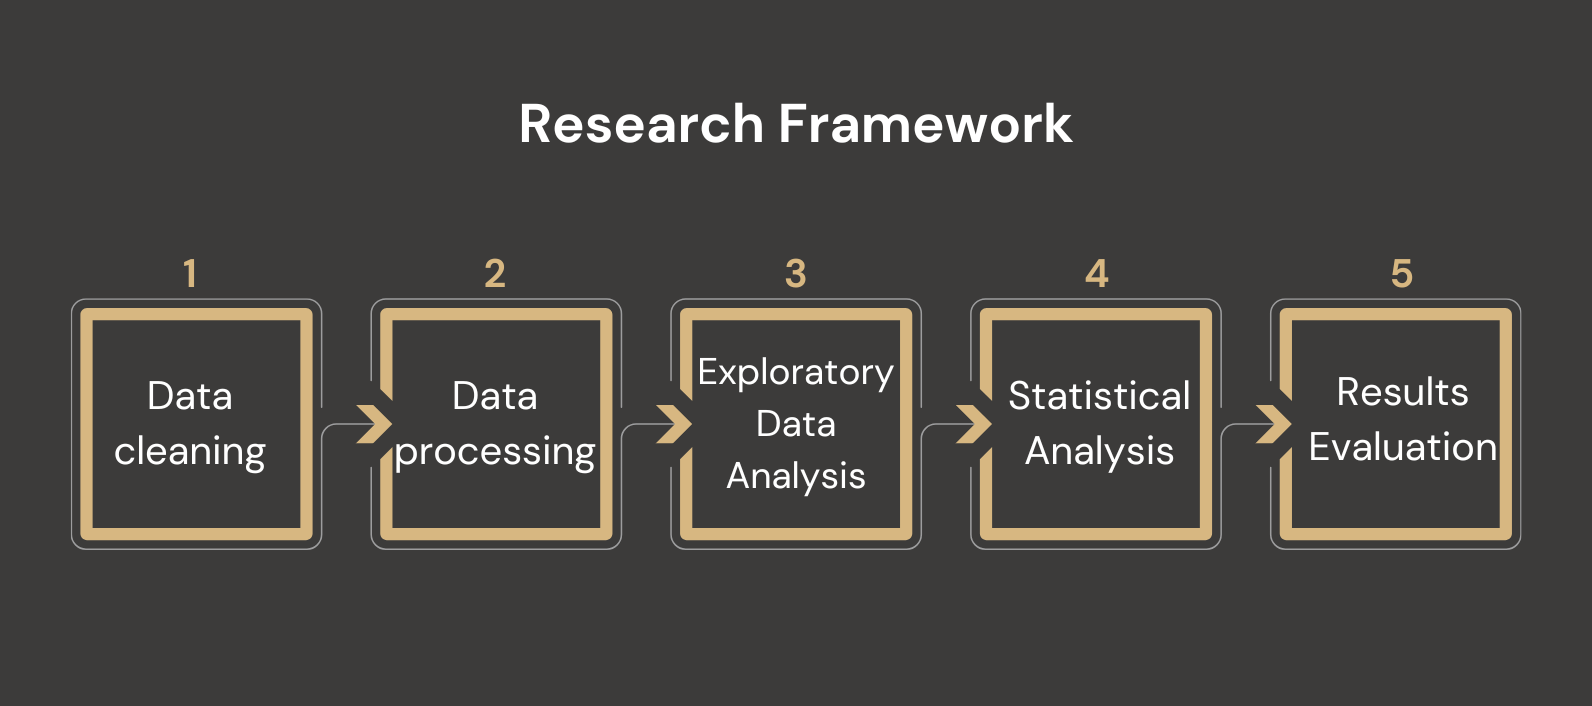

In [9]:
Image(filename='LT5-ACS-framework.png')

## 3.1 Data Description

The dataset used for this project was obtained from Kaggle, from user Priyam Choksi. 

The dataset consists of the following attributes: 

* Start: Indicates the start date of the data record. 

* End: Indicates the end date of the data record. 

* Open: Initial trading price of Bitcoin at the start of the day. 

* High: The highest price reached by Bitcoin during the day. 

* Low: The lowest price reached by Bitcoin during the day. 

* Close: The closing trading price of Bitcoin at the end of the day. 

* Volume: Aggregate volume of Bitcoin traded throughout the day. 

* Market Cap: The overall market valuation of Bitcoin at day’s end. 

## 3.2 Statistical Methods

The following statistical models are applied in this project:

### 1. Kolmogorov-Smirnov (K-S) Test

The Kolmogorov-Smirnov (K-S) Test is a non-parametric test used to compare a sample with a reference distribution or two samples with each other. It evaluates the null hypothesis that the samples come from the same distribution by calculating the maximum difference (D) between the empirical cumulative distribution function (ECDF) and the reference distribution's cumulative distribution function (CDF), or between the ECDFs of two samples. 

Applications of the K-S test include goodness-of-fit testing (comparing a sample to a theoretical distribution) and comparing two samples to check if they come from the same distribution. The K-S test is advantageous because it makes no assumptions about the data distribution and is sensitive to differences in location and shape of empirical distributions.

### 2. Mann-Whitney U Test

The Mann-Whitney U test, or Wilcoxon rank-sum test, is a non-parametric test used to compare two independent samples. It evaluates if their population distributions differ without assuming normal distribution. This test is useful when data do not meet the assumptions required for parametric tests like the t-test. 

The test ranks all observations from both groups together and compares the sum of ranks between them. If the distributions are the same, the rank sums will be similar. The U statistic is calculated and compared to a critical value or used to find a p-value. 

Applications of the Mann-Whitney U test include comparing medical treatments, evaluating customer satisfaction between product versions, and assessing behavioral differences. It is advantageous because it does not assume normality and is effective with small sample sizes. 

### 3. Wilcoxon Signed-Rank Test

The Wilcoxon Signed-Rank Test is a non-parametric test used to compare two related samples or repeated measurements on a single sample. It evaluates if their population mean ranks differ without assuming normal distribution, serving as an alternative to the paired t-test. 

The test ranks the absolute differences between paired observations and assigns signs based on the direction of the differences. The test statistic, W, is the smaller of the sum of positive or negative ranks. The p-value from W assesses the significance of differences. 

Applications of the Wilcoxon Signed-Rank test include comparing pre- and post-treatment measurements, evaluating behavioral changes, and comparing crop yields under different treatments. It does not assume normality and handles ties by assigning average ranks.

### 4. Holm's Step-Down Procedure

Holm's Step-Down Procedure is a method in statistical testing to control family-wise error rates in multiple comparisons, more powerful than Bonferroni correction. It involves sorting p-values and sequentially testing each against adjusted significance thresholds. If a p-value falls below its threshold, the null hypothesis is rejected, continuing until no further rejections occur. 

It's used in genomics for significant gene identification, clinical trials for comparing treatments to controls, and behavioral sciences for evaluating interventions. The procedure offers greater power and is easy to implement. 

### 5. Bootstrap for hypothesis testing 

The bootstrap method is a statistical tool for estimating the distribution of a statistic (e.g., mean, median) by resampling with replacement from observed data. It's useful when the theoretical distribution is unknown or when parametric assumptions like normality are invalid. This method involves generating multiple bootstrap samples, calculating the statistic of interest for each sample, and using the resulting distribution to estimate properties like standard error and confidence intervals. 

Applications of bootstrap include estimating confidence intervals without relying on parametric assumptions, conducting hypothesis tests when the sampling distribution is complex or unknown, and validating statistical models by assessing stability across bootstrap samples. Its advantages lie in its non-parametric nature, versatility across different statistics and problems, and relative simplicity in implementation despite computational intensity. 

## 3.3 Exploratory Data Analysis

To start the EDA, the team prepared the dataset and plotted the historical prices of Bitcoin from the Kaggle dataset.

In [11]:
# Loading the dataset
df = pd.read_csv('data/bitcoin_2010-07-17_2024-05-23.csv')
df = df[['Start', 'Close']]
# df['Close'] = np.log(df['Close'])
df = df.set_index('Start')
df = df.astype(float)
df = df.sort_index()
df.index = pd.to_datetime(df.index)
df.head()

Close
Start             
2010-07-17  0.0500
2010-07-18  0.0858
2010-07-19  0.0808
2010-07-20  0.0747
2010-07-21  0.0792

Text(0.5, 1.0, 'BTC historical price chart')

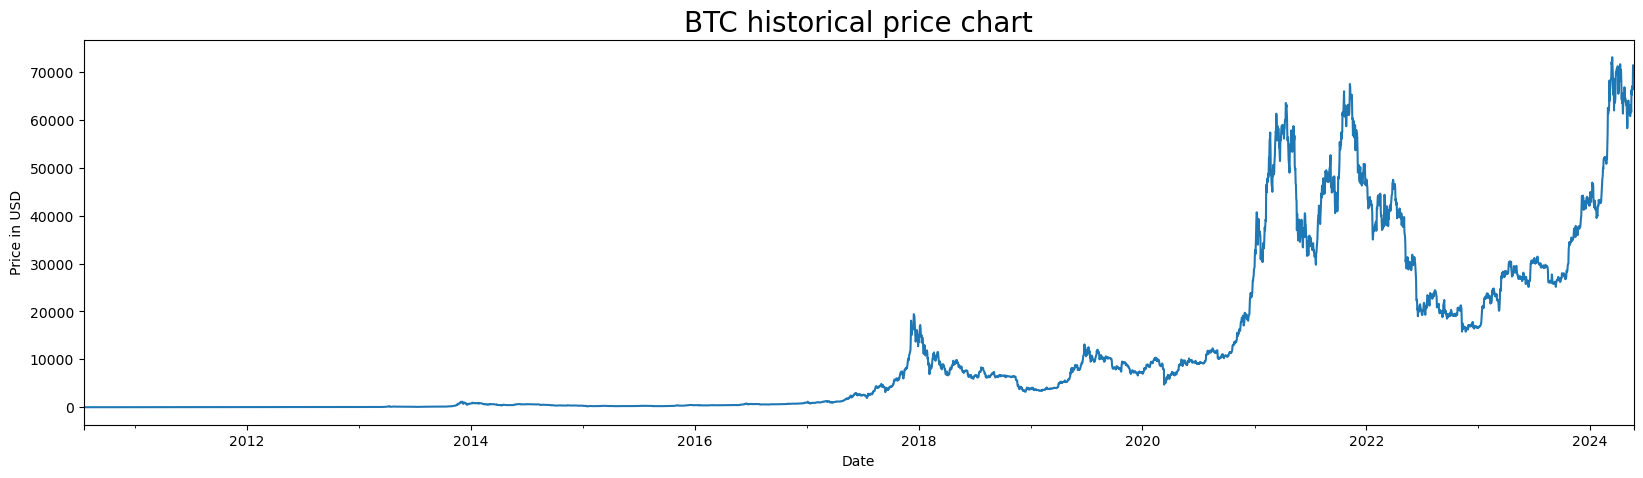

In [35]:
ax = df['Close'].plot(figsize=(20,5))
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('BTC historical price chart', fontsize=20)

For the analysis, the team computed the 15-day moving average and 15-day volatility (standard deviation) of the prices.

In [14]:
df['mean_15'] = df['Close'].rolling(window=15).mean().fillna(0)
df['std_15'] = df['Close'].rolling(window=15).std().fillna(0)
df.head(100)

Close   mean_15    std_15
Start                                 
2010-07-17  0.0500  0.000000  0.000000
2010-07-18  0.0858  0.000000  0.000000
2010-07-19  0.0808  0.000000  0.000000
2010-07-20  0.0747  0.000000  0.000000
2010-07-21  0.0792  0.000000  0.000000
...            ...       ...       ...
2010-10-20  0.0990  0.094020  0.012774
2010-10-21  0.1070  0.096967  0.009813
2010-10-22  0.1025  0.099333  0.005323
2010-10-23  0.1055  0.100573  0.004285
2010-10-24  0.1150  0.101987  0.005273

[100 rows x 3 columns]

The halving dates were then defined. These dates became the basis for the definition of the Halving periods, which included the 6-month periods before and after the halving dates. All the other trading dates fell under the Non-Halving periods.

In [15]:
halving_dates=[
datetime.datetime.strptime('2012/11/28', '%Y/%m/%d'),
datetime.datetime.strptime('2016/07/09', '%Y/%m/%d'),
datetime.datetime.strptime('2020/05/11', '%Y/%m/%d'),
datetime.datetime.strptime('2024/04/19', '%Y/%m/%d')
]
halving_dates

[datetime.datetime(2012, 11, 28, 0, 0),
 datetime.datetime(2016, 7, 9, 0, 0),
 datetime.datetime(2020, 5, 11, 0, 0),
 datetime.datetime(2024, 4, 19, 0, 0)]

In [16]:
halving_regions = [(x - datetime.timedelta(days=180), x + datetime.timedelta(days=180)) for x in halving_dates]
halving_regions

[(datetime.datetime(2012, 6, 1, 0, 0), datetime.datetime(2013, 5, 27, 0, 0)),
 (datetime.datetime(2016, 1, 11, 0, 0), datetime.datetime(2017, 1, 5, 0, 0)),
 (datetime.datetime(2019, 11, 13, 0, 0), datetime.datetime(2020, 11, 7, 0, 0)),
 (datetime.datetime(2023, 10, 22, 0, 0),
  datetime.datetime(2024, 10, 16, 0, 0))]

The plot below marks the Halving dates (red line).

The overall data was divided into four regions that correspond to the four Halving periods so far. Each region contained the Halving periods (in purple), or the six-month periods before and after the Halving dates, and the preceding Non-Halving periods (in white).

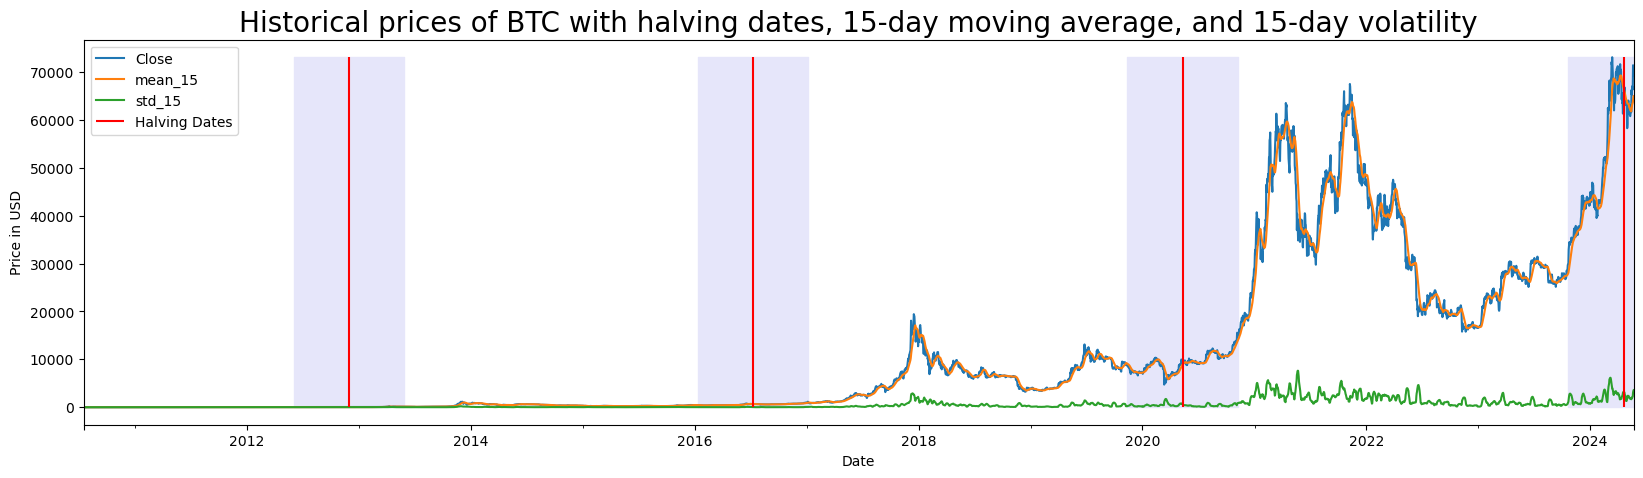

In [33]:
ax = df.plot(figsize=(20,5))
ax.vlines(halving_dates, 0, df['Close'].max(), colors='r', label='Halving Dates')
for item in halving_regions:
    ax.fill_between(item, 0 , df['Close'].max(), color='lavender',)
ax.legend()
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('Historical prices of BTC with halving dates, 15-day moving average, and 15-day volatility', fontsize=20)
plt.show()

The plots below show close-up views of the four Non-Halving and Halving regions. 

In [20]:
halving_data = []
nonhalving_data = []

for idx, item in enumerate(halving_regions):
    # halving_data.append(df.loc[])
    halving_data.append(df.loc[item[0] : item[1]])
    if idx == 0:
        nonhalving_data.append(df.loc[ : item[0]])
    else: 
        nonhalving_data.append(df.loc[halving_regions[idx -1][1] : item[0]])

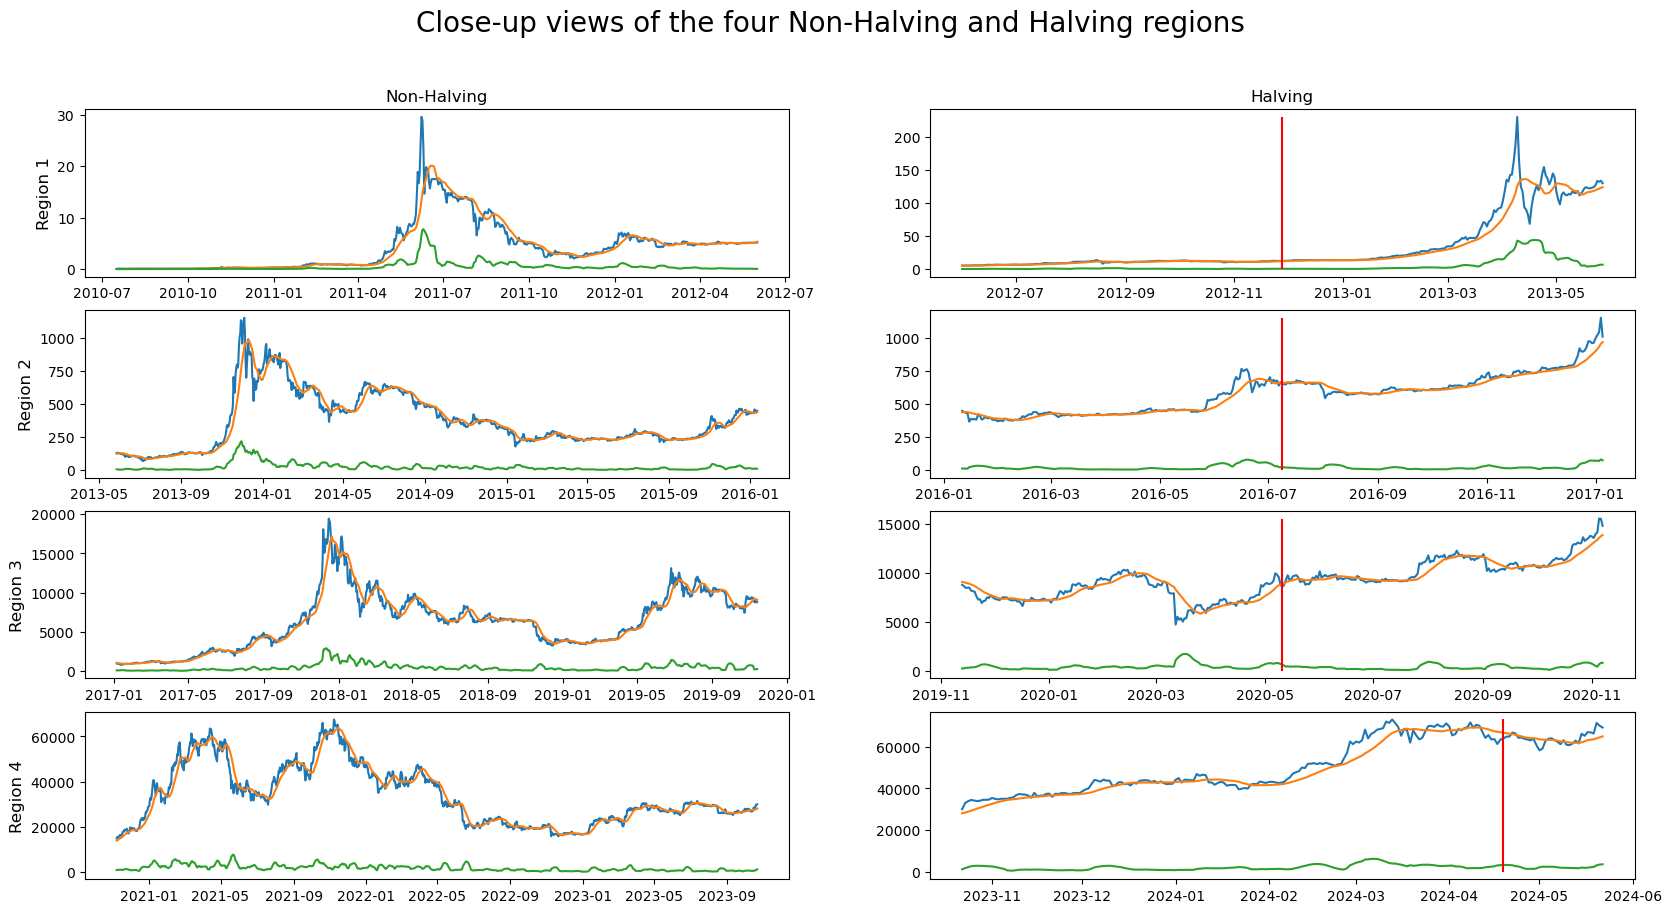

In [43]:
ctr = 1
fig, ax = plt.subplots(4,2, figsize=(20,10))
for nhd, hd in zip(nonhalving_data, halving_data):
    ax[ctr -1][0].plot(nhd)
    ax[ctr -1][1].plot(hd)
    ax[ctr -1][1].vlines(halving_dates[ctr - 1], 0, hd['Close'].max(), colors='r', label='Halving Date')
    ctr += 1
ax[0][0].set_title('Non-Halving')
ax[0][1].set_title('Halving')
for i in range(4):
    ax[i][0].set_ylabel(f'Region {i+1}', rotation=90, size='large')

fig.suptitle('Close-up views of the four Non-Halving and Halving regions ', fontsize=20)
plt.show()

Various organizations like Cointelegraph have claimed that Bitcoin prices have exhibited bullish behaviors leading up to the halvings,[7] but it is evident from the charts above that bullishness is not necessarily exclusive to these halving events.

For this project, the team would like to establish if there is a statistically significant difference between price movements during the periods immediately preceding and succeeding these halving events versus the periods in between.

To do this, the team decided to focus on price volatility as this variable is "self-levelling,” meaning that it returns to a baseline range. This is in contrast to price values that exhibit large, persistent changes over time – making meaningful inferences more challenging.

The team plotted the volatility and volatility distribution for the non-halving and having regions. 

In [36]:
ctr = 1
fig, ax = plt.subplots(4,2, figsize=(20,10))
for nhd, hd in zip(nonhalving_data, halving_data):
    ax[ctr -1][0].plot(nhd['std_15'])
    ax[ctr -1][1].plot(hd['std_15'])
    ax[ctr -1][1].vlines(halving_dates[ctr - 1], 0, hd['std_15'].max(), colors='r', label='Halving Date')
    ctr += 1
ax[0][0].set_title('Non-Halving')
ax[0][1].set_title('Halving')
for i in range(4):
    ax[i][0].set_ylabel(f'Region {i+1}', rotation=90, size='large')

fig.suptitle('Volatility plots of the non-halving and halving regions',fontsize=20)
plt.show()

In [37]:
ctr = 1
fig, ax = plt.subplots(4,2, figsize=(20,10))
for nhd, hd in zip(nonhalving_data, halving_data):
    ax[ctr -1][0].hist(nhd['std_15'], bins=100)
    ax[ctr -1][1].hist(hd['std_15'], bins=100)
    ctr += 1
ax[0][0].set_title('Non-Halving')
ax[0][1].set_title('Halving')
for i in range(4):
    ax[i][0].set_ylabel(f'Region {i+1}', rotation=90, size='large')
fig.suptitle('Volatility distribution plots of the Non-Halving and Halving regions ',fontsize=20)
plt.show()

Visual inspection of the plots suggests that the volatility data do not follow normal distributions. The team confirmed the appropriate distributions using the Kolmogorov-Smirnov (KS) Test. Provided in the figure below are the results of the test in different distributions. 

In [38]:
from scipy import stats

distributions = {
    'Normal': stats.norm,
    'Exponential': stats.expon,
    'Logistic': stats.logistic,
    'Cosine': stats.cosine,
    'Cauchy': stats.cauchy,
    'T-distribution': stats.t,
    'Chi-square': stats.chi2,
    'Gamma': stats.gamma,
    'Folded normal' : stats.foldnorm,
    'Gauss hypergeometric': stats.gausshyper,
    'Power-Function ': stats.powerlaw,
}

In [46]:
l=len(distributions)
fig, ax = plt.subplots(l,len(nonhalving_data),figsize=(20,l * 3))
company_ctr = 0
fit_results={}
cols = ["Region 1", "Region 2", "Region 3", "Region 4"]
nonhalving_named = zip(cols, nonhalving_data)
for cname, cdata in nonhalving_named:
    print(cdata['std_15'].shape)
    cdata = cdata['std_15']
    ks_results = {}
    largest_p = 0
    best_fit = ''
    for name, distribution in distributions.items():
        params = distribution.fit(cdata)
        D, p_value = stats.kstest(cdata, distribution.cdf, args=params)
        ks_results[name] = {'D': D, 'p_value': p_value}
        if p_value > largest_p:
            best_fit = name
            largest_p = p_value
        print(f"{name} distribution: D={D}, p-value={p_value}")
    fit_results[cname] = best_fit
    print (f"\nBest Fit for {cname}: {best_fit}, p_value={p_value}\n\n")

    x = np.linspace(min(cdata), max(cdata), 1000)
   
    ctr = 0
    for name, distribution in distributions.items():
        params = distribution.fit(cdata)
        pdf_fitted = distribution.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])
        ax[ctr][company_ctr].hist(cdata, bins=100, density=True, alpha=0.6,)
        tx = ax[ctr][company_ctr].twinx()
        if name == fit_results[cname]:
            tx.text(max(x)*0.8, max(pdf_fitted)*0.8, "Best Fit", horizontalalignment='right', fontweight='bold')
        tx.plot(x, pdf_fitted, label='', color = 'r')
        tx.set_ylim(0)
        ctr += 1
    company_ctr += 1

# cols = [x for x,y in nonhalving_named]
rows = [x for x, y in distributions.items()]
# print (cols)
for axs, col in zip(ax[0], cols):
    axs.set_title(col,size='large')

for axs, row in zip(ax[:,0], rows):
    axs.set_ylabel(row, rotation=90 )

fig.tight_layout()
fig.suptitle('Kolmogorov-Smirnov test results for the Non-Halving regions',fontsize=20, y=1.02)
plt.show()

(686,)
Normal distribution: D=0.3072919294640344, p-value=5.2359120219863435e-58
Exponential distribution: D=0.2576719838800123, p-value=1.1784307622119855e-40
Logistic distribution: D=0.284027636054673, p-value=1.8348980960339477e-49
Cosine distribution: D=0.4421105723058444, p-value=1.1727052653120068e-122
Cauchy distribution: D=0.2996400349416348, p-value=4.0744264039940234e-55
T-distribution distribution: D=0.31637720017506343, p-value=1.5229269454270707e-61
Chi-square distribution: D=0.14897291365125076, p-value=9.380780806205302e-14
Gamma distribution: D=0.1300135492802887, p-value=1.4332070244991678e-10
Folded normal distribution: D=0.42141500986731173, p-value=5.8006524737557216e-111
Gauss hypergeometric distribution: D=0.14375846913092827, p-value=7.795045054761106e-13
Power-Function  distribution: D=0.5849937876301486, p-value=1.0009227604327279e-223

Best Fit for Region 1: Gamma, p_value=1.0009227604327279e-223


(960,)
Normal distribution: D=0.2355511485154213, p-value=2.45

(361,)
Normal distribution: D=0.3487197576671748, p-value=9.709710754996155e-40
Exponential distribution: D=0.42682967999539245, p-value=3.2575594374212715e-60
Logistic distribution: D=0.34765038990091346, p-value=1.7172973727223704e-39
Cosine distribution: D=0.41230814009516015, p-value=4.846557626938341e-56
Cauchy distribution: D=0.2501194226368792, p-value=2.194022808269083e-20
T-distribution distribution: D=0.2509208756610233, p-value=1.627293202950973e-20
Chi-square distribution: D=0.25542314621889817, p-value=2.9802900986946163e-21
Gamma distribution: D=0.25030539428962634, p-value=2.0472308329475204e-20
Folded normal distribution: D=0.5840771680815161, p-value=1.4108693023803808e-117
Gauss hypergeometric distribution: D=0.21804042287547237, p-value=1.505235031205079e-15
Power-Function  distribution: D=0.27176253940147066, p-value=4.803748597182489e-24

Best Fit for Region 1: Gauss hypergeometric, p_value=4.803748597182489e-24


(361,)
Normal distribution: D=0.20500200084375142, 

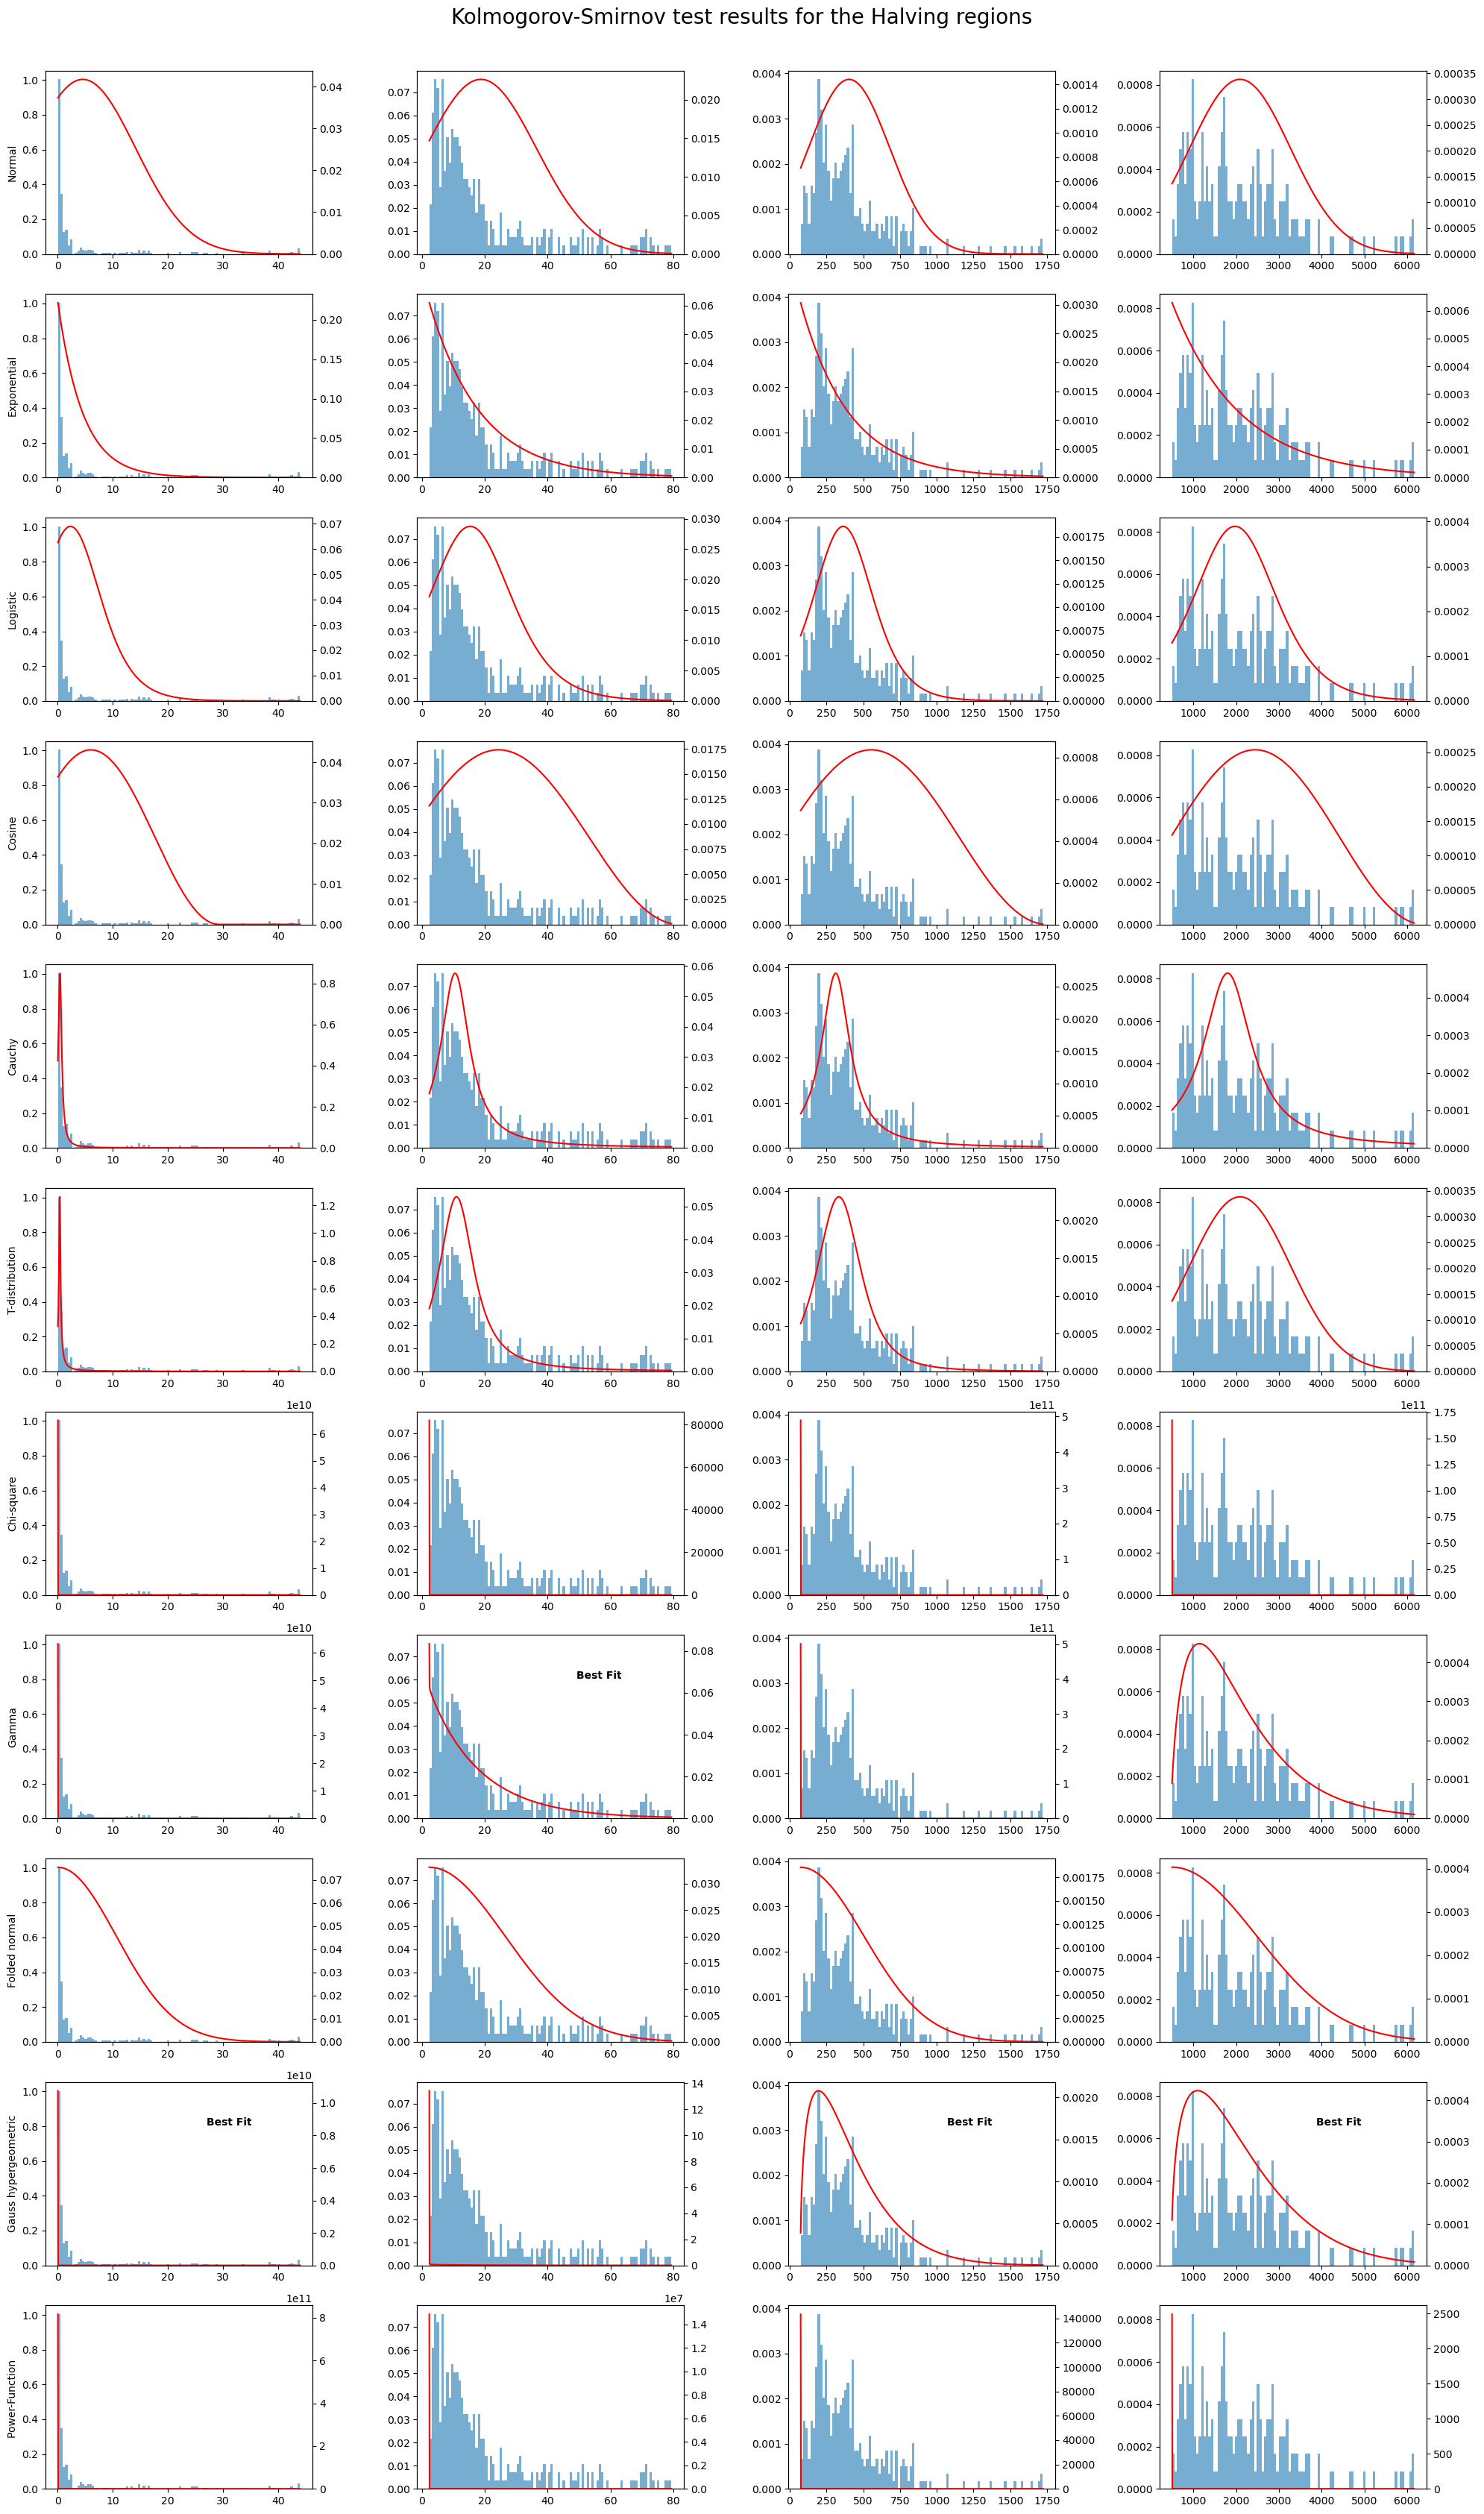

In [45]:
l=len(distributions)
fig, ax = plt.subplots(l,len(halving_data),figsize=(20,l * 3))
company_ctr = 0
fit_results={}
cols = ["Region 1", "Region 2", "Region 3", "Region 4"]
halving_named = zip(cols, halving_data)
for cname, cdata in halving_named:
    print(cdata['std_15'].shape)
    cdata = cdata['std_15']
    ks_results = {}
    largest_p = 0
    best_fit = ''
    for name, distribution in distributions.items():
        params = distribution.fit(cdata)
        D, p_value = stats.kstest(cdata, distribution.cdf, args=params)
        ks_results[name] = {'D': D, 'p_value': p_value}
        if p_value > largest_p:
            best_fit = name
            largest_p = p_value
        print(f"{name} distribution: D={D}, p-value={p_value}")
    fit_results[cname] = best_fit
    print (f"\nBest Fit for {cname}: {best_fit}, p_value={p_value}\n\n")

    x = np.linspace(min(cdata), max(cdata), 1000)
   
    ctr = 0
    for name, distribution in distributions.items():
        params = distribution.fit(cdata)
        pdf_fitted = distribution.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])
        ax[ctr][company_ctr].hist(cdata, bins=100, density=True, alpha=0.6,)
        tx = ax[ctr][company_ctr].twinx()
        if name == fit_results[cname]:
            tx.text(max(x)*0.8, max(pdf_fitted)*0.8, "Best Fit", horizontalalignment='right', fontweight='bold')
        tx.plot(x, pdf_fitted, label='', color = 'r')
        tx.set_ylim(0)
        ctr += 1
    company_ctr += 1

cols = [x for x,y in halving_named]
rows = [x for x, y in distributions.items()]

for axs, col in zip(ax[0], cols):
    axs.set_title(col,size='large')

for axs, row in zip(ax[:,0], rows):
    axs.set_ylabel(row, rotation=90 )

fig.tight_layout()
fig.suptitle('Kolmogorov-Smirnov test results for the Halving regions',fontsize=20, y=1.02)
plt.show()

Based on the plots above, it was confirmed that the volatility data is not normally distributed.

Given that, traditional parametric tests such as Z-test are not applicable. Instead, non-parametric tests such as the Mann-Whitney U test and Wilcoxon Signed-Rank test are deemed more appropriate. These non-parametric tests are well-suited for situations involving non-normal distributions as they do not rely on specific distributional assumptions and are robust against outliers and skewed data.

# 4. Findings

## 4.1 Non-parametric Testing

The following conditions were applied for all the non-parametric tests that the team employed:

Null hypothesis $(H_0)$ = There is no statistically significant difference between difference between the two datasets.

Alternative Hypothesis $(H_a)$ = There is a statistically significant difference between the two datasets. 

The team took each of the four regions and compared the data six months around the halving dates versus the period prior to it.

 ### Mann-Whitney U Test

In [48]:
alpha = 0.05
p_values = {}
for i in range(len(halving_data)):
    stat, p_value = mannwhitneyu(halving_data[i]['std_15'], nonhalving_data[i]['std_15'])
    print(f'Region = {i+1}')
    print(f'stat      = {stat}')
    print(f'p-value = {p_value}')
    p_values[i] = p_value
    if p_value <= alpha:
        print(f'p-value less than alpha! Reject H0.\n\n')
    else:
        print(f'p-value greater than alpha! Cannot Reject H0.\n\n')

Region = 1
stat      = 190507.5
p-value = 1.2498277448792928e-46
p-value less than alpha! Reject H0.


Region = 2
stat      = 160731.5
p-value = 0.04227859287284292
p-value less than alpha! Reject H0.


Region = 3
stat      = 209910.5
p-value = 0.001112150497068756
p-value less than alpha! Reject H0.


Region = 4
stat      = 142528.5
p-value = 6.667806693277911e-08
p-value less than alpha! Reject H0.




 ### Performing Holm's Step-Down Procedure on the Mann-Whitney U Test results

In [49]:
# print(p_values)
df_stat=pd.DataFrame()
df_stat['region']=p_values.keys()
df_stat['p_value']=p_values.values()
alpha = 0.05
df_stat.sort_values(by='p_value', inplace=True) # Sort in place!
df_stat['L_thresholds'] = alpha/(df_stat.shape[0] + 1 - (np.arange(df_stat.shape[0]) + 1)) 
df_stat['reject'] = df_stat['p_value'] < df_stat['L_thresholds']
df_stat.reset_index(drop = True, inplace=True)
print(df_stat)
different = 0
if any(df_stat['reject'] == True):
    different = max(df_stat.loc[df_stat['reject'] == True].index +1)
not_different = len(df_stat.index) - different
print(f'\nMann-Whitney U Test - Halving/Non-Halving regions that are not statistically different: {not_different/(different+not_different) * 100}%\n')

   region       p_value  L_thresholds  reject
0       0  1.249828e-46      0.012500    True
1       3  6.667807e-08      0.016667    True
2       2  1.112150e-03      0.025000    True
3       1  4.227859e-02      0.050000    True

Mann-Whitney U Test - Halving/Non-Halving regions that are not statistically different: 0.0%



### Wilcoxon Signed-Rank Test

In [50]:
alpha = 0.05
p_values = {}
for i in range(len(halving_data)):
    n = len(halving_data[i])
    stat, p_value = wilcoxon(halving_data[i]['std_15'], nonhalving_data[i]['std_15'][:n])
    print(f'Region = {i+1}')
    print(f'stat      = {stat}')
    print(f'p-value = {p_value}')
    p_values[i] = p_value
    if p_value <= alpha:
        print(f'p-value less than alpha! Reject H0.\n\n')
    else:
        print(f'p-value greater than alpha! Cannot Reject H0.\n\n')

Region = 1
stat      = 271.0
p-value = 6.110651804864595e-60
p-value less than alpha! Reject H0.


Region = 2
stat      = 21212.0
p-value = 7.692655277550934e-09
p-value less than alpha! Reject H0.


Region = 3
stat      = 22646.0
p-value = 4.364634915602467e-07
p-value less than alpha! Reject H0.


Region = 4
stat      = 7488.0
p-value = 9.567558652063945e-06
p-value less than alpha! Reject H0.




### Performing Holm's Step-Down Procedure on the Wilcoxon Signed-Rank Test results

In [51]:
# print(p_values)
df_stat=pd.DataFrame()
df_stat['region']=p_values.keys()
df_stat['p_value']=p_values.values()
alpha = 0.05
df_stat.sort_values(by='p_value', inplace=True) # Sort in place!
df_stat['L_thresholds'] = alpha/(df_stat.shape[0] + 1 - (np.arange(df_stat.shape[0]) + 1)) 
df_stat['reject'] = df_stat['p_value'] < df_stat['L_thresholds']
df_stat.reset_index(drop = True, inplace=True)
print(df_stat)
different = 0
if any(df_stat['reject'] == True):
    different = max(df_stat.loc[df_stat['reject'] == True].index +1)
not_different = len(df_stat.index) - different
print(f'\nWilcoxon Signed-Rank Test - Halving/Non-Halving regions that are not statistically different: {not_different/(different+not_different) * 100}%\n')

   region       p_value  L_thresholds  reject
0       0  6.110652e-60      0.012500    True
1       1  7.692655e-09      0.016667    True
2       2  4.364635e-07      0.025000    True
3       3  9.567559e-06      0.050000    True

Wilcoxon Signed-Rank Test - Halving/Non-Halving regions that are not statistically different: 0.0%



## 4.2 Confirming with Bootstrap Hypothesis Testing

As an alternative to the non-parametric tests, the team also conducted Bootstrapping to represent the data as normal distributions. Plotting the mean gathered from 1000 samples each shows the volatility data to be approximately normal.

The team first conducted a two-tailed bootstrap hypothesis test to compare the volatility of Bitcoin prices during Halving and Non-Halving periods, following the same hypotheses used in the non-parametric testing above.

In [59]:
def bootstrap(data, num_samples=1000, statistic=np.mean):
    """Generate bootstrap samples and compute the statistic for each sample."""
    n = len(data)
    boot_samples = np.random.choice(data, (num_samples, n), replace=True)
    return np.array([statistic(sample) for sample in boot_samples])

num_samples = 1000

halving_std = [item['std_15'].to_numpy() for item in halving_data]
nonhalving_std = [item['std_15'].to_numpy() for item in nonhalving_data]

bootstrapped_halving_means = [bootstrap(data, num_samples) for data in halving_std]
bootstrapped_nonhalving_means = [bootstrap(data, num_samples) for data in nonhalving_std]

confidence_level = 0.95
alpha = 1 - confidence_level
results = []
fig, ax = plt.subplots(4, 2, figsize=(15,10))
for i in range(len(bootstrapped_halving_means)):
    
    halving_mean = bootstrapped_halving_means[i]
    nonhalving_mean = bootstrapped_nonhalving_means[i]
    ax[i][0].hist(bootstrapped_halving_means[i], bins=30)
    x = np.linspace(min(bootstrapped_halving_means[i]), max(bootstrapped_halving_means[i]), 1000)
    params = norm.fit(bootstrapped_halving_means[i])
    pdf_fitted = norm.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])
    tx = ax[i][0].twinx()
    tx.plot(x, pdf_fitted, label='', color = 'r')
    tx.set_ylim(0)
    x = np.linspace(min(bootstrapped_nonhalving_means[i]), max(bootstrapped_nonhalving_means[i]), 1000)
    ax[i][1].hist(bootstrapped_nonhalving_means[i], bins=30)
    halving_mean = bootstrapped_halving_means[i]
    nonhalving_mean = bootstrapped_nonhalving_means[i]
    params = norm.fit(bootstrapped_nonhalving_means[i])
    pdf_fitted = norm.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])
    tx = ax[i][1].twinx()
    tx.plot(x, pdf_fitted, label='', color = 'r')
    tx.set_ylim(0)

    # Calculate confidence intervals
    ci_halving = np.percentile(halving_mean, [100 * alpha / 2, 100 * (1 - alpha / 2)])
    ci_nonhalving = np.percentile(nonhalving_mean, [100 * alpha / 2, 100 * (1 - alpha / 2)])

    # Calculate p-value
    diff_means = halving_mean - nonhalving_mean
    p_value = np.mean(diff_means <= 0) if np.mean(halving_mean) > np.mean(nonhalving_mean) else np.mean(diff_means >= 0)

    results.append({
        'region': i + 1,
        'halving_mean': np.mean(halving_mean),
        'nonhalving_mean': np.mean(nonhalving_mean),
        'ci_halving': ci_halving,
        'ci_nonhalving': ci_nonhalving,
        'p_value': p_value
    })
rows = ['Region 1','Region 2','Region 3','Region 4']
cols = ['Halving', 'Non-Halving']

for axs, col in zip(ax[0], cols):
    axs.set_title(col,size='large')

for axs, row in zip(ax[:,0], rows):
    axs.set_ylabel(row, rotation=90)

fig.tight_layout()
fig.suptitle('Distributions after bootstrapping (two-tailed test)',fontsize=20, y=1.02)
plt.show()

results_df = pd.DataFrame(results)
results_df['reject_null'] = results_df['p_value'] < alpha
print(results_df)

   region  halving_mean  nonhalving_mean  \
0       1      4.573049         0.504249   
1       2     18.783465        24.614806   
2       3    403.578152       432.281006   
3       4   2088.549017      1714.337711   

                                 ci_halving  \
0    [3.669991832097592, 5.565398112612034]   
1   [16.806688262580817, 20.69506157943618]   
2   [375.69500426750153, 433.4523302355716]   
3  [1939.1742878464393, 2243.6453139973496]   

                               ci_nonhalving  p_value  reject_null  
0  [0.42678035361802347, 0.5811310935863039]    0.000         True  
1    [22.62375768279351, 26.567385703195278]    0.001         True  
2    [406.88871850473305, 460.5508711492516]    0.086        False  
3   [1641.2493572836643, 1796.5514459329788]    0.000         True  


### Performing Holm's Step-Down Procedure on the Bootstrap Hypothesis Testing results (two-tailed)

In [57]:
# print(p_values)
alpha = 0.05
results_df.sort_values(by='p_value', inplace=True) # Sort in place!
results_df['L_thresholds'] = alpha/(df_stat.shape[0] + 1 - (np.arange(df_stat.shape[0]) + 1)) 
results_df['reject_null'] = results_df['p_value'] < results_df['L_thresholds']
results_df.reset_index(drop=True, inplace=True)
print(results_df)
different = 0
if any(results_df['reject_null'] == True):
    different = max(results_df.loc[results_df['reject_null'] == True].index +1)
not_different = len(results_df.index) - different
print(f'\n2- Tailed Bootstrap Test - Halving/Non-Halving regions that are not statistically different: {not_different/(different+not_different) * 100}%\n')

   region  halving_mean  nonhalving_mean  \
0       1      4.535829         0.503324   
1       2     18.858003        24.638648   
2       4   2088.527805      1716.603773   
3       3    403.395328       432.730048   

                                 ci_halving  \
0       [3.594269177655046, 5.588780404251]   
1   [17.005524543875293, 20.68088005714299]   
2   [1934.550157776368, 2242.6561925013743]   
3  [374.43885657383913, 431.40828043952973]   

                              ci_nonhalving  p_value  reject_null  \
0  [0.4321512035451908, 0.5831442302664336]    0.000         True   
1  [22.741119790314443, 26.685085698573783]    0.000         True   
2   [1639.6501487389608, 1796.880728223069]    0.000         True   
3   [406.20845320971864, 459.3333396140436]    0.077        False   

   L_thresholds  
0      0.012500  
1      0.016667  
2      0.025000  
3      0.050000  

2- Tailed Bootstrap Test - Halving/Non-Halving regions that are not statistically different: 25.0%



The team also performed a one-tailed test with the following conditions: 

Null hypothesis $(H_0)$ = There is no statistically significant difference between difference between the two datasets. 

Alternative Hypothesis $(H_a)$ = The volatility of Bitcoin prices during the Halving periods is statistically significantly higher than during the Non-Halving periods.

The results of the one-tailed test are as follows: 

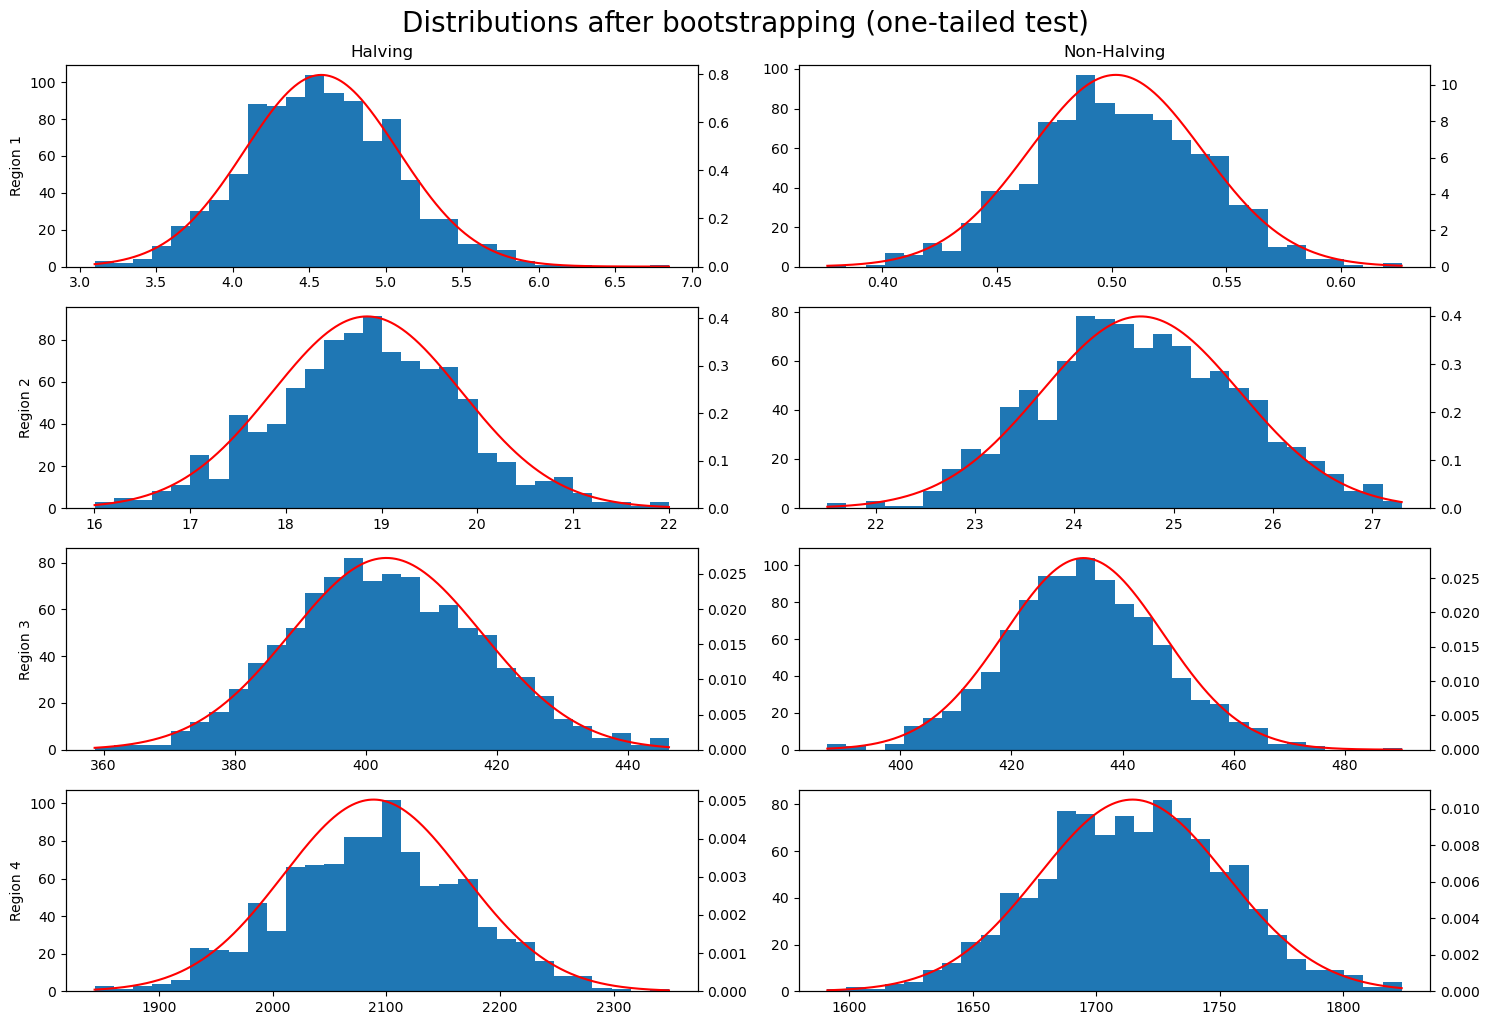

   region  halving_mean  nonhalving_mean  \
0       1      4.579436         0.501797   
1       2     18.848048        24.666896   
2       3    403.151313       432.976167   
3       4   2088.839579      1714.733833   

                                ci_halving  \
0    [3.646417807730777, 5.60734943978125]   
1  [16.897963840675917, 20.88747655940947]   
2   [375.536226334963, 433.14544033264485]   
3   [1934.4923995071724, 2238.07123413496]   

                              ci_nonhalving  p_value  reject_null  
0  [0.4256089564945287, 0.5733048765992046]    1.000        False  
1    [22.78090147515111, 26.62837647430996]    0.000         True  
2    [405.5098388804926, 462.1011976062974]    0.074        False  
3   [1642.316397113557, 1791.5100842406116]    1.000        False  


In [60]:
def bootstrap(data, num_samples=1000, statistic=np.mean):
    """Generate bootstrap samples and compute the statistic for each sample."""
    n = len(data)
    boot_samples = np.random.choice(data, (num_samples, n), replace=True)
    return np.array([statistic(sample) for sample in boot_samples])

num_samples = 1000

halving_std = [item['std_15'].to_numpy() for item in halving_data]
nonhalving_std = [item['std_15'].to_numpy() for item in nonhalving_data]

bootstrapped_halving_means = [bootstrap(data, num_samples) for data in halving_std]
bootstrapped_nonhalving_means = [bootstrap(data, num_samples) for data in nonhalving_std]

confidence_level = 0.95
alpha = 1 - confidence_level
results = []
fig, ax = plt.subplots(4, 2, figsize=(15,10))
for i in range(len(bootstrapped_halving_means)):
    ax[i][0].hist(bootstrapped_halving_means[i], bins=30)
    x = np.linspace(min(bootstrapped_halving_means[i]), max(bootstrapped_halving_means[i]), 1000)
    params = norm.fit(bootstrapped_halving_means[i])
    pdf_fitted = norm.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])
    tx = ax[i][0].twinx()
    tx.plot(x, pdf_fitted, label='', color = 'r')
    tx.set_ylim(0)
    x = np.linspace(min(bootstrapped_nonhalving_means[i]), max(bootstrapped_nonhalving_means[i]), 1000)
    ax[i][1].hist(bootstrapped_nonhalving_means[i], bins=30)
    halving_mean = bootstrapped_halving_means[i]
    nonhalving_mean = bootstrapped_nonhalving_means[i]
    params = norm.fit(bootstrapped_nonhalving_means[i])
    pdf_fitted = norm.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])
    tx = ax[i][1].twinx()
    tx.plot(x, pdf_fitted, label='', color = 'r')
    tx.set_ylim(0)

    # Calculate p-value for one-tailed test
    diff_means = halving_mean - nonhalving_mean
    p_value = np.mean(diff_means >= 0)  # One-tailed test: checking if halving_mean is greater than nonhalving_mean

    results.append({
        'region': i + 1,
        'halving_mean': np.mean(halving_mean),
        'nonhalving_mean': np.mean(nonhalving_mean),
        'ci_halving': np.percentile(halving_mean, [100 * alpha / 2, 100 * (1 - alpha / 2)]),
        'ci_nonhalving': np.percentile(nonhalving_mean, [100 * alpha / 2, 100 * (1 - alpha / 2)]),
        'p_value': p_value
    })
rows = ['Region 1','Region 2','Region 3','Region 4']
cols = ['Halving', 'Non-Halving']

for axs, col in zip(ax[0], cols):
    axs.set_title(col,size='large')

for axs, row in zip(ax[:,0], rows):
    axs.set_ylabel(row, rotation=90 )

fig.tight_layout()
fig.suptitle('Distributions after bootstrapping (one-tailed test)',fontsize=20, y=1.02)
plt.show()
    
results_df = pd.DataFrame(results)
results_df['reject_null'] = results_df['p_value'] < alpha

print(results_df)


### Performing Holm's Step-Down Procedure on the Bootstrap Hypothesis Testing results (one-tailed)

In [61]:
# print(p_values)
alpha = 0.05
results_df.sort_values(by='p_value', inplace=True) # Sort in place!
results_df['L_thresholds'] = alpha/(df_stat.shape[0] + 1 - (np.arange(df_stat.shape[0]) + 1)) 
results_df['reject_null'] = results_df['p_value'] < results_df['L_thresholds']
results_df.reset_index(inplace=True, drop=True)
print(results_df)
different = 0
if any(results_df['reject_null'] == True):
    different = max(results_df.loc[results_df['reject_null'] == True].index +1)
not_different = len(results_df.index) - different
print(f'\n1- Tailed Bootstrap Test - Halving/Non-Halving regions that are not statistically different: {not_different/(different+not_different) * 100}%\n')

   region  halving_mean  nonhalving_mean  \
0       2     18.848048        24.666896   
1       3    403.151313       432.976167   
2       1      4.579436         0.501797   
3       4   2088.839579      1714.733833   

                                ci_halving  \
0  [16.897963840675917, 20.88747655940947]   
1   [375.536226334963, 433.14544033264485]   
2    [3.646417807730777, 5.60734943978125]   
3   [1934.4923995071724, 2238.07123413496]   

                              ci_nonhalving  p_value  reject_null  \
0    [22.78090147515111, 26.62837647430996]    0.000         True   
1    [405.5098388804926, 462.1011976062974]    0.074        False   
2  [0.4256089564945287, 0.5733048765992046]    1.000        False   
3   [1642.316397113557, 1791.5100842406116]    1.000        False   

   L_thresholds  
0      0.012500  
1      0.016667  
2      0.025000  
3      0.050000  

1- Tailed Bootstrap Test - Halving/Non-Halving regions that are not statistically different: 75.0%



## 4.3 Summary of Findings

The non-parametric tests show that there is a statistically significant difference between the Halving and Non-Halving data across all 4 regions. Meanwhile, the two-tailed Bootstrap Hypothesis Test shows that there are statistically significant differences in regions 1, 2 and 4.  

Additionally, the one-tailed Bootstrap Hypothesis Test shows that for region 2, volatility was higher around the Halving event than it was during the prior Non-Halving period. This suggests that the Halving events affected the volatility of Bitcoin’s price, but it does not eliminate the possibility that these differences were due to other factors aside from the halving events.

To check whether other factors indeed affect volatility, the team tested sub-sections of the non-halving regions to see if they showed significant differences in volatility.

### Intra-Region Comparisons (Non-Halving Regions)

The following charts show each of the four Non-Halving regions divided into four subsections. The plots show empirical volatility and their distributions.

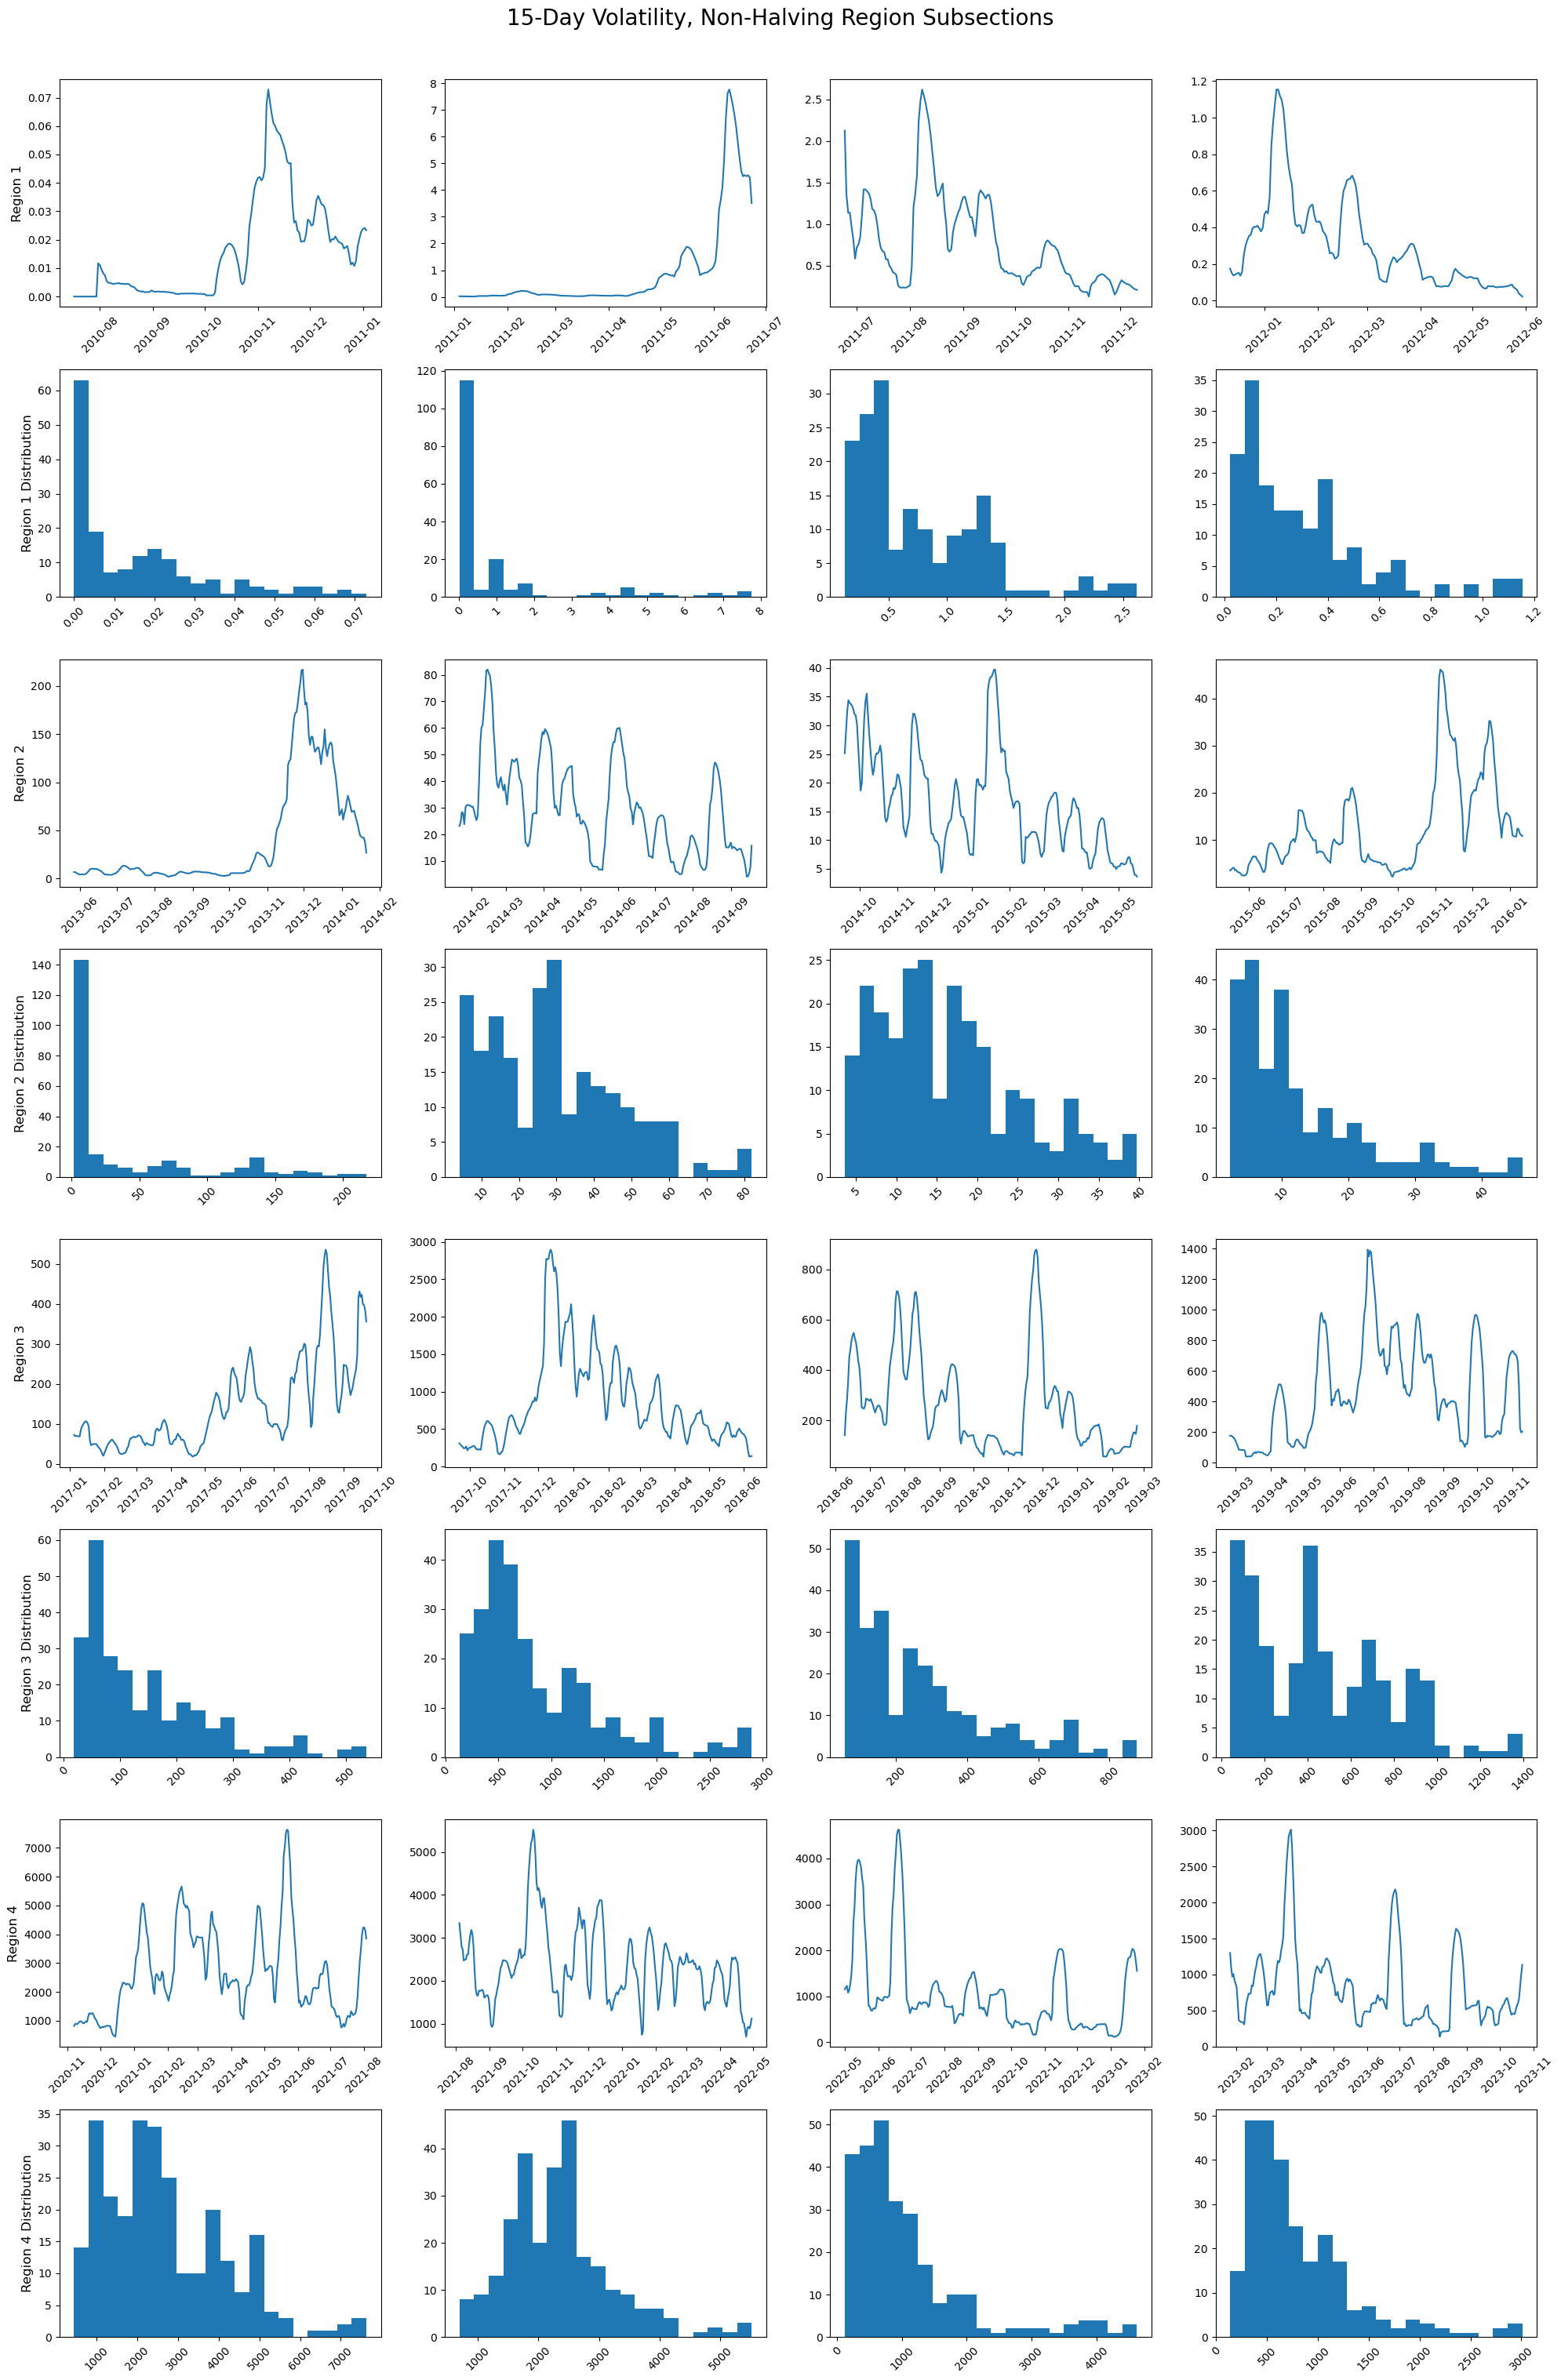

In [64]:
fig, ax = plt.subplots(8, 4, figsize=(20,30))
regions = []
for idx, region in enumerate(nonhalving_data):
    # divide region in to 4 subsections and compare them:
    size = math.floor(len(region.index)/4)
    subsections = []
    # print(len(region.index))
    # print(size)
    for i in range(4):
        subsections.append(region.iloc[i * size:(i+1)*size])
        # print(len(subsections[i].index))
        ax[idx * 2][i].plot(subsections[i]['std_15'])
        ax[idx * 2][i].tick_params(axis='x', labelrotation=45)
        ax[idx * 2][0].set_ylabel(f'Region {idx+1}', rotation=90, size='large')
        ax[idx * 2 + 1][i].hist(subsections[i]['std_15'], bins=20)
        ax[idx * 2 + 1][i].tick_params(axis='x', labelrotation=45)
        ax[idx * 2 + 1][0].set_ylabel(f'Region {idx+1} Distribution', rotation=90, size='large')
    regions.append(subsections)
    plt.tight_layout()
    fig.suptitle('15-Day Volatility, Non-Halving Region Subsections',fontsize=20, y=1.01)

The same two non-parametric tests, along with Holm's Step-Down procedure, were also applied to the different combinations of the four subsections within a region. The same null and alternative hypotheses were applied.

 #### Mann-Whitney U Test

In [65]:
alpha = 0.05
for idx, region in enumerate(regions):
    indices = itertools.combinations(region,2)
    sec_p_values = {}
    for j, item in enumerate(indices):
        stat, p_value = mannwhitneyu(item[0]['std_15'], item[1]['std_15'])
        # print(f'p-value = {p_value:.6f}')
        # if p_value <= alpha:
        #     print(f'p-value less than alpha! Reject H0.\n\n')
        # else:
        #     print(f'p-value greater than alpha! Cannot Reject H0.\n\n')
        sec_p_values[j]=p_value
    # Holm's Stepdown Procedure
    df_sec_stat=pd.DataFrame()
    df_sec_stat['region']=sec_p_values.keys()
    df_sec_stat['p_value']=sec_p_values.values()
    alpha = 0.05
    df_sec_stat.sort_values(by='p_value', inplace=True) # Sort in place!
    df_sec_stat['L_thresholds'] = alpha/(df_sec_stat.shape[0] + 1 - (np.arange(df_sec_stat.shape[0]) + 1)) 
    df_sec_stat['reject'] = df_sec_stat['p_value'] < df_sec_stat['L_thresholds']
    df_sec_stat.reset_index(drop=True, inplace=True)
    print(df_sec_stat)
    different = 0
    if any(df_sec_stat['reject'] == True):
        different = max(df_sec_stat.loc[df_sec_stat['reject'] == True].index +1)
    not_different = len(df_sec_stat.index) - different
    print(f'\n Mann-Whitney U Test - Non-Halving subsections that are not statistically different for Region {idx+1}: {not_different/(different+not_different) * 100}%\n')

   region       p_value  L_thresholds  reject
0       1  1.447022e-57      0.008333    True
1       2  1.180198e-56      0.010000    True
2       0  2.425882e-45      0.012500    True
3       5  1.048101e-22      0.016667    True
4       3  4.673508e-12      0.025000    True
5       4  7.151344e-03      0.050000    True

 Mann-Whitney U Test - Non-Halving subsections that are not statistically different for Region 1: 0.0%

   region       p_value  L_thresholds  reject
0       4  5.638971e-33      0.008333    True
1       3  2.011372e-18      0.010000    True
2       5  3.889037e-10      0.012500    True
3       0  5.703163e-08      0.016667    True
4       1  7.271376e-03      0.025000    True
5       2  5.248205e-02      0.050000   False

 Mann-Whitney U Test - Non-Halving subsections that are not statistically different for Region 2: 16.666666666666664%

   region       p_value  L_thresholds  reject
0       0  1.525936e-75      0.008333    True
1       3  1.100998e-50      0.010000  

#### Wilcoxon Signed-Rank Test

In [66]:
alpha = 0.05
for idx, region in enumerate(regions):
    indices = itertools.combinations(region,2)
    sec_p_values = {}
    for j, item in enumerate(indices):
        n = len(item[0])
        stat, p_value = wilcoxon(item[0]['std_15'], item[1]['std_15'][:n])
        # stat, p_value = mannwhitneyu(item[0]['std_15'], item[1]['std_15'])
        # print(f'p-value = {p_value:.6f}')
        # if p_value <= alpha:
        #     print(f'p-value less than alpha! Reject H0.\n\n')
        # else:
        #     print(f'p-value greater than alpha! Cannot Reject H0.\n\n')
        sec_p_values[j]=p_value
    # Holm's Stepdown Procedure
    df_sec_stat=pd.DataFrame()
    df_sec_stat['region']=sec_p_values.keys()
    df_sec_stat['p_value']=sec_p_values.values()
    alpha = 0.05
    df_sec_stat.sort_values(by='p_value', inplace=True) # Sort in place!
    df_sec_stat['L_thresholds'] = alpha/(df_sec_stat.shape[0] + 1 - (np.arange(df_sec_stat.shape[0]) + 1)) 
    df_sec_stat['reject'] = df_sec_stat['p_value'] < df_sec_stat['L_thresholds']
    df_sec_stat.reset_index(drop=True, inplace=True)
    print(df_sec_stat)
    different = 0
    if any(df_sec_stat['reject'] == True):
        different = max(df_sec_stat.loc[df_sec_stat['reject'] == True].index +1)
    not_different = len(df_sec_stat.index) - different
    print(f'\nWilcoxon Signed-Rank Test - Non-Halving subsections that are not statistically different for Region {idx+1}: {not_different/(different+not_different) * 100}%\n')

   region       p_value  L_thresholds  reject
0       0  8.196709e-30      0.008333    True
1       1  8.196709e-30      0.010000    True
2       2  8.342461e-30      0.012500    True
3       5  5.969934e-20      0.016667    True
4       3  9.061202e-03      0.025000    True
5       4  3.389276e-01      0.050000   False

Wilcoxon Signed-Rank Test - Non-Halving subsections that are not statistically different for Region 1: 16.666666666666664%

   region       p_value  L_thresholds  reject
0       3  2.868999e-23      0.008333    True
1       4  4.207028e-22      0.010000    True
2       2  1.541205e-11      0.012500    True
3       5  1.650990e-04      0.016667    True
4       1  5.418085e-02      0.025000   False
5       0  8.701503e-01      0.050000   False

Wilcoxon Signed-Rank Test - Non-Halving subsections that are not statistically different for Region 2: 33.33333333333333%

   region       p_value  L_thresholds  reject
0       0  2.598465e-42      0.008333    True
1       3  2.54

# 5. Conclusion and Recommendations

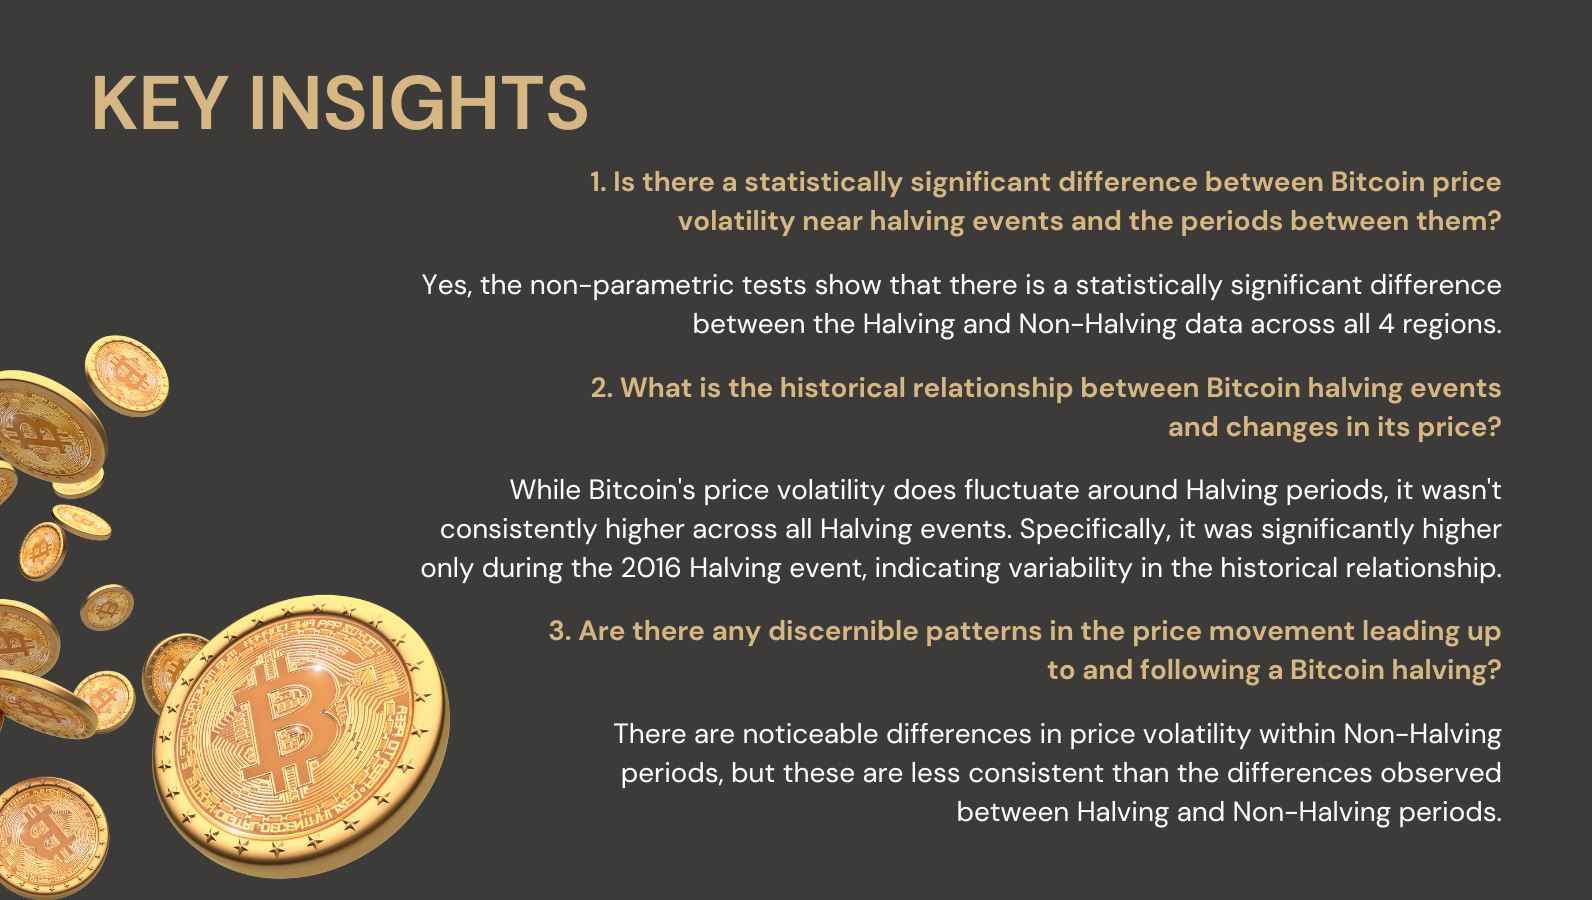

In [69]:
Image(filename='LT5-ACS-findings.png')

This project's findings confirm a statistically significant difference in the volatility of prices between Halving and Non-Halving periods over the years. This difference was consistently observed in the historical data and throughout all the Halving events that ever took place. 

However, this does not necessarily mean that Bitcoin's price volatility has been historically higher during Halving periods. Our hypothesis testing using bootstrapping showed that it was only in 2016 when the volatility of Bitcoin prices during the Halving period was significantly higher than during the Non-Halving period. This suggests that while the prices tend to fluctuate around Halving periods, these fluctuations were not always extreme. 

Lastly, our findings show that there are also noticeable differences in the volatility of prices within the Non-Halving periods, but these differences are not as consistent when compared to the volatility differences observed between Halving and Non-Halving periods. This indicates that while the volatility of Bitcoin prices may fluctuate across different time frames, these fluctuations do not follow a consistent pattern as compared to the distinct differences observed when comparing Halving and Non-Halving periods directly. 

These findings suggest that market participants, such as investors and traders, may expect Bitcoin prices to fluctuate again as we near the next Halving event in 2028. Understanding these findings may also guide them in making informed decisions in the highly dynamic cryptocurrency market.

# 6. References

[1]  Dan Ashmore, “Bitcoin Price History 2009 to 2022 – Forbes Advisor,” Forbes, October 11, 2022, https://www.forbes.com/advisor/investing/cryptocurrency/bitcoin-price-history/.

[2] Alex Dovbnya, “Bitcoin Named the Best Asset of the Decade by Bank of America Merrill Lynch,” U.Today, December 13, 2019, https://u.today/bitcoin-named-the-best-asset-of-the-decade-by-bank-of-america-merrill-lynch.

[3] James Page, “What Are the Math Problems in Bitcoin Mining?,” Crypto Head, August 25, 2021, https://cryptohead.io/what-are-the-math-problems-in-bitcoin-mining/.

[4] Luke Conway, “Bitcoin Halving: What You Need to Know,” Investopedia, May 21, 2021, https://www.investopedia.com/bitcoin-halving-4843769. 

[5] James Royal and Mercedes Barba, “Bitcoin’s Price History: Tracking the Volatile Rise of the World’s Biggest Cryptocurrency,” Bankrate, April 29, 2024, https://www.bankrate.com/investing/bitcoin-price-history/.

[6] Priyam Choksi, “Bitcoin Historical Prices & Activity (2010-2024),” Kaggle, May 23, 2024, https://www.kaggle.com/datasets/priyamchoksi/bitcoin-historical-prices-and-activity-2010-2024.

[7] Kristina Lucrezia Cornèr, “Bitcoin Halving and Its Impact on Tokenomics, Mining and Market Sentiment,” ed. Guneet Kaur, Cointelegraph, March 2, 2024, https://cointelegraph.com/learn/bitcoin-halving-impact-on-tokenomics-mining-and-market-sentiment.

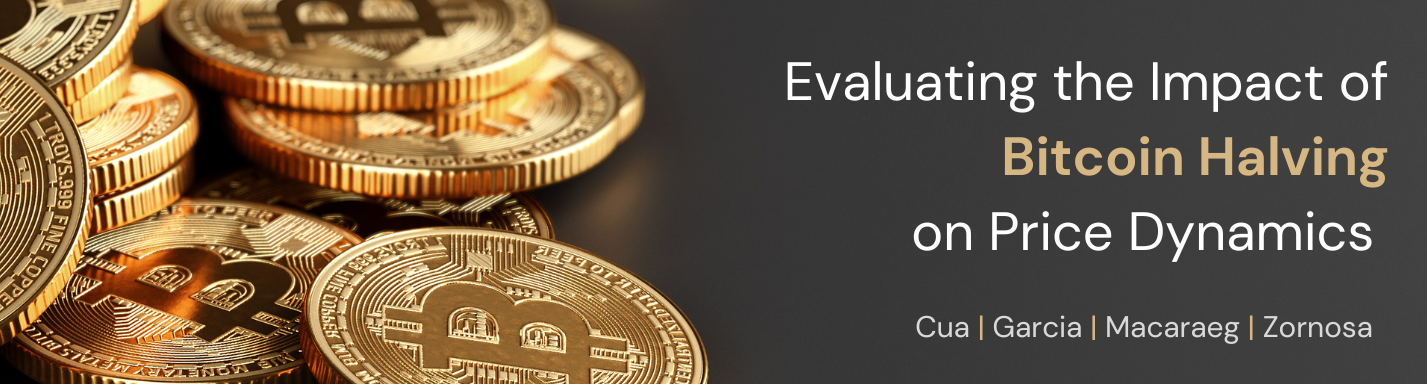

In [71]:
Image(filename='LT5-ACS-footer.png')